Predict Airline Ticket

In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_data=pd.read_excel(r"C:\Users\Pc 1\Documents\GitHub\ML_Airline-Price-Predictor\Data_Train.xlsx")

In [3]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
train_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [5]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [6]:
train_data[train_data['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [7]:
train_data.dropna(inplace=True)

In [8]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [9]:
train_data.shape

(10682, 11)

In [10]:
train_data.dtypes


Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [11]:
def change_into_datetime(col):
    train_data[col]=pd.to_datetime(train_data[col])

In [12]:
train_data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [13]:
for i in ['Date_of_Journey','Dep_Time','Arrival_Time']:
    change_into_datetime(i)

In [14]:
train_data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [15]:
train_data['Journey_Day']=train_data['Date_of_Journey'].dt.day
train_data['Journey_month']=train_data['Date_of_Journey'].dt.month
train_data['Journey_year']=train_data['Date_of_Journey'].dt.year

In [16]:
train_data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_month,Journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2022-04-16 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-04-16 05:50:00,2022-04-16 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2022-04-16 09:25:00,2022-06-10 04:25:00,19h,2 stops,No info,13882,6,9,2019


In [17]:
train_data.drop('Date_of_Journey',axis=1,inplace=True)

In [18]:
train_data.head(3)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_month,Journey_year
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-04-16 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-04-16 05:50:00,2022-04-16 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2022-04-16 09:25:00,2022-06-10 04:25:00,19h,2 stops,No info,13882,6,9,2019


In [19]:
def extract_hour(df,col):
    df[col+ '_hour']=df[col].dt.hour
    
def extract_min(df,col):
    df[col+ '_minute']=df[col].dt.minute
    
def drop_column(df,col):
    df.drop(col, axis=1, inplace=True)

In [20]:
extract_hour(train_data,'Dep_Time')
extract_min(train_data,'Dep_Time')
drop_column(train_data,'Dep_Time')


In [21]:
extract_hour(train_data,'Arrival_Time')
extract_min(train_data,'Arrival_Time')
drop_column(train_data,'Arrival_Time')

In [22]:
train_data.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,2019,9,25,4,25


In [23]:
duration=list(train_data['Duration'])
m=range(len(duration))
m

range(0, 10682)

In [24]:
duration=list(train_data['Duration'])
for i in range(len(duration)):
    if len(duration[i].split(" "))==2:
        pass
    else:
        if 'h' in duration[i]:
            duration[i]=duration[i] + ' 0m'
        else:
            duration[i]='0h ' + duration[i]

In [25]:
train_data['Duration']=duration

In [26]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,2019,16,50,21,35


In [27]:
def hour(x):
    return x.split(" ")[0][0:-1]

def minute(x):
    return x.split(" ")[1][0:-1]

In [28]:
train_data['Duration_hours']=train_data['Duration'].apply(hour)
train_data['Duration_mins']=train_data['Duration'].apply(minute)

In [29]:
train_data.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,9,25,4,25,19,0


In [30]:
drop_column(train_data,"Duration")

In [31]:
train_data.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
Journey_Day             int64
Journey_month           int64
Journey_year            int64
Dep_Time_hour           int64
Dep_Time_minute         int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
Duration_hours         object
Duration_mins          object
dtype: object

In [32]:
train_data['Duration_hours']=train_data['Duration_hours'].astype(int)
train_data['Duration_mins']=train_data['Duration_mins'].astype(int)

In [33]:
train_data.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
Journey_Day             int64
Journey_month           int64
Journey_year            int64
Dep_Time_hour           int64
Dep_Time_minute         int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
Duration_hours          int32
Duration_mins           int32
dtype: object

In [34]:
cat_col=[col for col in train_data.columns if train_data[col].dtype=='O']
cat_col

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [35]:
cont_col =[col for col in train_data.columns if train_data[col].dtype!="O"]
cont_col

['Price',
 'Journey_Day',
 'Journey_month',
 'Journey_year',
 'Dep_Time_hour',
 'Dep_Time_minute',
 'Arrival_Time_hour',
 'Arrival_Time_minute',
 'Duration_hours',
 'Duration_mins']

In [36]:
categorical=train_data[cat_col]

In [37]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


In [38]:
categorical['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

<AxesSubplot:xlabel='Airline', ylabel='Price'>

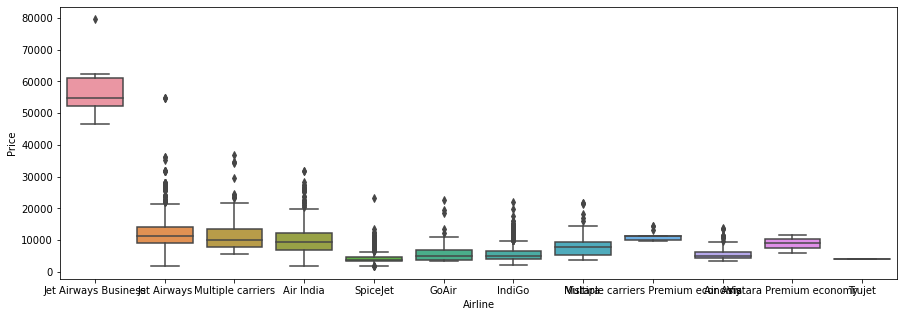

In [39]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Airline',y='Price',data=train_data.sort_values('Price',ascending=False))

In [40]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,2019,16,50,21,35,4,45


In [41]:
Airline=pd.get_dummies(categorical['Airline'],drop_first=True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [42]:
categorical['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [43]:
Source=pd.get_dummies(categorical['Source'],drop_first=True)
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [44]:
categorical['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

<AxesSubplot:xlabel='Destination', ylabel='Price'>

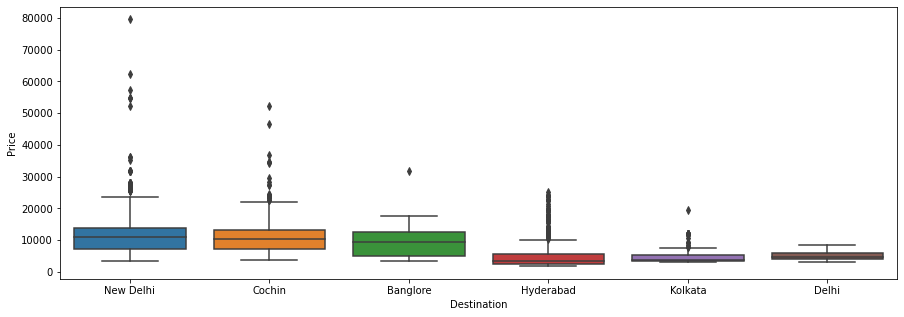

In [45]:
plt.figure(figsize=(15,5))
sns.boxplot(x="Destination", y="Price", data=train_data.sort_values('Price',ascending=False))

In [46]:
Destination=pd.get_dummies(categorical['Destination'],drop_first=True)
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [47]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


In [48]:
categorical['Route'].value_counts().unique

<bound method Series.unique of DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: Route, Length: 128, dtype: int64>

In [49]:
categorical['Route1']=categorical['Route'].str.split('→').str[0]
categorical['Route2']=categorical['Route'].str.split('→').str[1]
categorical['Route3']=categorical['Route'].str.split('→').str[2]
categorical['Route4']=categorical['Route'].str.split('→').str[3]
categorical['Route5']=categorical['Route'].str.split('→').str[4]


C:\Users\PC1~1\AppData\Local\Temp/ipykernel_22264/1109513565.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical['Route1']=categorical['Route'].str.split('→').str[0]
C:\Users\PC1~1\AppData\Local\Temp/ipykernel_22264/1109513565.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical['Route2']=categorical['Route'].str.split('→').str[1]
C:\Users\PC1~1\AppData\Local\Temp/ipykernel_22264/1109513565.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

In [50]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,BLR,NAG,DEL,NaN,NaN


In [51]:
drop_column(categorical,"Route")

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [52]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,1 stop,No info,BLR,NAG,DEL,NaN,NaN


In [53]:
categorical.isnull().sum()

Airline                0
Source                 0
Destination            0
Total_Stops            0
Additional_Info        0
Route1                 0
Route2                 0
Route3              3491
Route4              9116
Route5             10636
dtype: int64

In [54]:
categorical.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Route1', 'Route2', 'Route3', 'Route4', 'Route5'],
      dtype='object')

In [55]:
for i in ['Route3', 'Route4', 'Route5']:
    categorical[i].fillna('None',inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [56]:
categorical.isnull().sum()


Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
Route1             0
Route2             0
Route3             0
Route4             0
Route5             0
dtype: int64

In [57]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,non-stop,No info,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,2 stops,No info,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,2 stops,No info,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,1 stop,No info,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,1 stop,No info,BLR,NAG,DEL,None,None


In [58]:
for i in categorical.columns:
    print('{} has total {} categories'.format(i,len(categorical[i].value_counts())))

Airline has total 12 categories
Source has total 5 categories
Destination has total 6 categories
Total_Stops has total 5 categories
Additional_Info has total 10 categories
Route1 has total 5 categories
Route2 has total 45 categories
Route3 has total 30 categories
Route4 has total 14 categories
Route5 has total 6 categories


In [59]:
categorical.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Route1', 'Route2', 'Route3', 'Route4', 'Route5'],
      dtype='object')

In [60]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [61]:
for i in ['Route1', 'Route2', 'Route3', 'Route4', 'Route5']:
    categorical[i]=encoder.fit_transform(categorical[i])

C:\Users\PC1~1\AppData\Local\Temp/ipykernel_22264/1401747013.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical[i]=encoder.fit_transform(categorical[i])


In [62]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,non-stop,No info,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,No info,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,No info,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,No info,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1 stop,No info,0,34,8,13,5


In [63]:
drop_column(categorical,'Additional_Info')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [64]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,non-stop,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1 stop,0,34,8,13,5


In [65]:
categorical['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [66]:
dict={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [67]:
categorical['Total_Stops']=categorical['Total_Stops'].map(dict)

C:\Users\PC1~1\AppData\Local\Temp/ipykernel_22264/130354464.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical['Total_Stops']=categorical['Total_Stops'].map(dict)


In [68]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5
1,Air India,Kolkata,Banglore,2,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5


In [69]:
data_train=pd.concat([categorical,Airline,Source,Destination,train_data[cont_col]],axis=1)

In [70]:
data_train.head()

,Airline,Source,Destination,Total_Stops,Route1,Route2,Route3,Route4,Route5,Air India,...,Price,Journey_Day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5,0,...,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,2,25,1,3,5,1,...,7662,5,1,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5,0,...,13882,6,9,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5,0,...,6218,5,12,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5,0,...,13302,3,1,2019,16,50,21,35,4,45


In [71]:
drop_column(data_train,'Airline')
drop_column(data_train,'Source')
drop_column(data_train,'Destination')


In [72]:
data_train.head()

,Total_Stops,Route1,Route2,Route3,Route4,Route5,Air India,GoAir,IndiGo,Jet Airways,...,Price,Journey_Day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,0,0,13,29,13,5,0,0,1,0,...,3897,24,3,2019,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,...,7662,5,1,2019,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,...,13882,6,9,2019,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,...,6218,5,12,2019,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,...,13302,3,1,2019,16,50,21,35,4,45


In [73]:
def plot(df,col):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.distplot(df[col],ax=ax1)
    sns.boxplot(df[col],ax=ax2)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


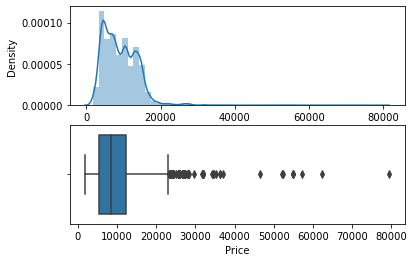

In [74]:
plot(data_train,"Price")

In [75]:
data_train['Price']=np.where(data_train['Price']>40000,data_train['Price'].median(),data_train['Price'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


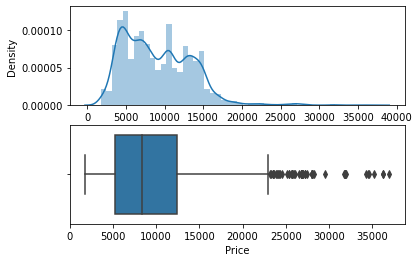

In [76]:
plot(data_train,"Price")

In [77]:
data_train.shape

(10682, 36)

In [110]:
 X=data_train.drop('Price',axis=1)
 X.head()

,Total_Stops,Route1,Route2,Route3,Route4,Route5,Air India,GoAir,IndiGo,Jet Airways,...,New Delhi,Journey_Day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,0,0,13,29,13,5,0,0,1,0,...,1,24,3,2019,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,...,0,5,1,2019,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,...,0,6,9,2019,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,...,0,5,12,2019,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,...,1,3,1,2019,16,50,21,35,4,45


In [111]:
y=data_train['Price']
y

0         3897.0
1         7662.0
2        13882.0
3         6218.0
4        13302.0
          ...   
10678     4107.0
10679     4145.0
10680     7229.0
10681    12648.0
10682    11753.0
Name: Price, Length: 10682, dtype: float64

In [112]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import mutual_info_regression

In [108]:
X.dtypes

Total_Stops                          int64
Route1                               int32
Route2                               int32
Route3                               int32
Route4                               int32
Route5                               int32
Air India                            uint8
GoAir                                uint8
IndiGo                               uint8
Jet Airways                          uint8
Jet Airways Business                 uint8
Multiple carriers                    uint8
Multiple carriers Premium economy    uint8
SpiceJet                             uint8
Trujet                               uint8
Vistara                              uint8
Vistara Premium economy              uint8
Chennai                              uint8
Delhi                                uint8
Kolkata                              uint8
Mumbai                               uint8
Cochin                               uint8
Delhi                                uint8
Hyderabad  

In [113]:
mutual_info_regression(X,y)

array([0.79888564, 0.94664484, 0.87992354, 0.55720654, 0.31069524,
       0.01704224, 0.29736259, 0.04659397, 0.35025042, 0.54418207,
       0.00567578, 0.25869439, 0.00477777, 0.19036817, 0.        ,
       0.14085109, 0.        , 0.12661458, 0.51143227, 0.45292539,
       0.19410012, 0.52357908, 0.32740871, 0.20511296, 0.13280936,
       0.17422894, 0.19400747, 0.24559338, 0.01067548, 0.34363658,
       0.26356125, 0.41096782, 0.34461401, 0.46033877, 0.33656308])

In [116]:
imp=pd.DataFrame(mutual_info_regression(X,y),index=X.columns)
imp.columns=['importance']

In [117]:
imp.sort_values(by='importance',ascending=False)

,importance
Route1,0.931112
Route2,0.868990
Total_Stops,0.790543
Route3,0.567830
Jet Airways,0.552559
Cochin,0.526893
Delhi,0.524223
Duration_hours,0.467716
Kolkata,0.450738
Arrival_Time_hour,0.404212


In [118]:
from sklearn.model_selection import train_test_split

In [119]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25, random_state=42)

In [120]:
from sklearn.ensemble import RandomForestRegressor

In [121]:
ml_model=RandomForestRegressor()

In [122]:
model=ml_model.fit(X_train,y_train)

In [123]:
y_pred=model.predict(X_test)
y_pred


array([16793.03,  6189.54,  8872.  , ...,  3569.34,  6389.21,  6823.65])

In [124]:
y_pred.shape

(2671,)

In [125]:
import pickle

In [126]:
file=open(r'C:\Users\Pc 1\Documents\GitHub\ML_Airline-Price-Predictor/rf_random.pkl','wb')

In [127]:
pickle.dump(model,file)

In [128]:
model=open(r'C:\Users\Pc 1\Documents\GitHub\ML_Airline-Price-Predictor/rf_random.pkl','rb')

In [129]:
forest=pickle.load(model)

In [130]:
forest.predict(X_test)

array([16793.03,  6189.54,  8872.  , ...,  3569.34,  6389.21,  6823.65])

In [131]:
def mape(y_true,y_pred):
    y_true,y_pred=np.array(y_true),np.array(y_pred)
    
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

In [132]:
mape(y_test,forest.predict(X_test))

12.731462419160891

In [133]:
def predict(ml_model):
    
    model=ml_model.fit(X_train,y_train)
    print('Training_score: {}'.format(model.score(X_train,y_train)))
    y_prediction=model.predict(X_test)
    print('Predictions are : {}'.format(y_prediction))
    print('\n')
    
    from sklearn import metrics
    r2_score=metrics.r2_score(y_test,y_prediction)
    print('r2_score: {}'.format(r2_score))
    print('MSE : ', metrics.mean_squared_error(y_test,y_prediction))
    print('MAE : ', metrics.mean_absolute_error(y_test,y_prediction))
    print('RMSE : ', np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))
    print('MAPE : ', mape(y_test,y_prediction))
    sns.distplot(y_test-y_prediction)

Training_score: 0.9529655380205276
Predictions are : [16657.21  5905.42  8769.95 ...  3549.67  6291.05  6808.01]


r2_score: 0.8352036418469263
MSE :  3253834.930095275
MAE :  1118.9028949589765
RMSE :  1803.838942393493
MAPE :  12.657387761727174


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


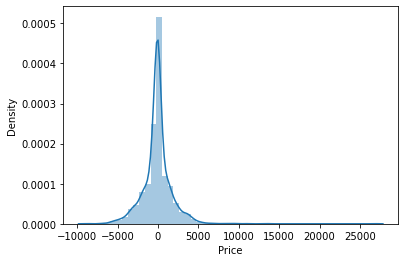

In [134]:
predict(RandomForestRegressor())

In [135]:
from sklearn.model_selection import RandomizedSearchCV

In [136]:
reg_rf=RandomForestRegressor()

In [137]:
np.linspace(start=1000,stop=1200,num=6)

array([1000., 1040., 1080., 1120., 1160., 1200.])

In [138]:
# Number of trees in random forest
n_estimators=[int(x) for x in np.linspace(start=1000,stop=1200,num=6)]

# Number of features to consider at every split
max_features=["auto", "sqrt"]

# Maximum number of levels in tree
max_depth=[int(x) for x in np.linspace(start=5,stop=30,num=4)]

# Minimum number of samples required to split a node
min_samples_split=[5,10,15,100]

In [139]:
# Create the grid or hyper-parameter space
random_grid={
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split
    
}

In [140]:
random_grid

{'n_estimators': [1000, 1040, 1080, 1120, 1160, 1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 13, 21, 30],
 'min_samples_split': [5, 10, 15, 100]}

In [141]:
rf_Random=RandomizedSearchCV(reg_rf,param_distributions=random_grid,cv=3,verbose=2,n_jobs=-1)

In [142]:
rf_Random.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [1000, 1040, 1080, 1120,
                                                         1160, 1200]},
                   verbose=2)

In [143]:
### to get your best model..
rf_Random.best_params_

{'n_estimators': 1160,
 'min_samples_split': 15,
 'max_features': 'auto',
 'max_depth': 30}

In [144]:
pred2=rf_Random.predict(X_test)

In [145]:
from sklearn import metrics
metrics.r2_score(y_test,pred2)

0.8552141428929063